In [8]:
using Distributions
using StatsPlots
default(fmt=:png)

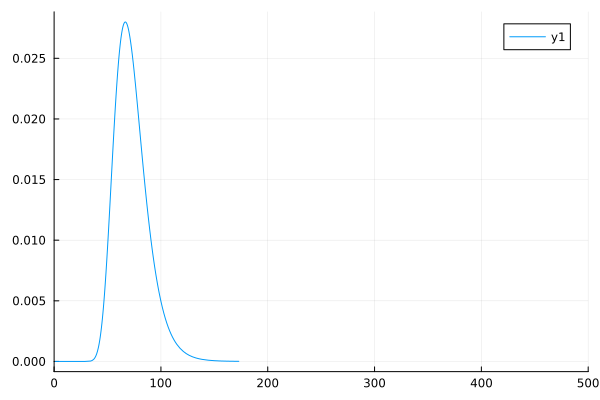

In [23]:
invgam = InverseGamma(23, 1600)
plot(invgam; xlim=(0, 500))

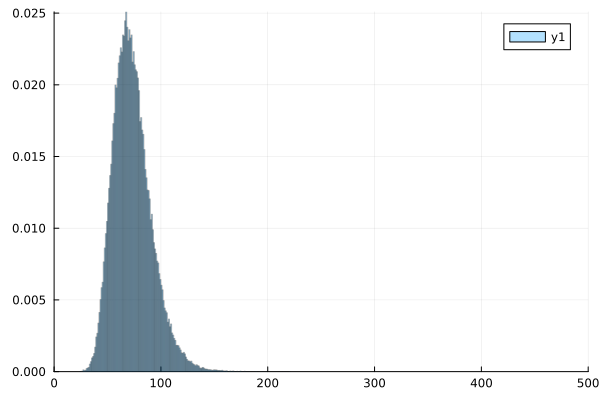

In [24]:
L = 10^5
Λ = rand(invgam, L)
X = @. rand(Poisson(Λ))
histogram(X; norm=true, alpha=0.3)
plot!(xlim=(0, 500))

mean(X) = 3811.794117647059
std(X) = 7794.341808584946


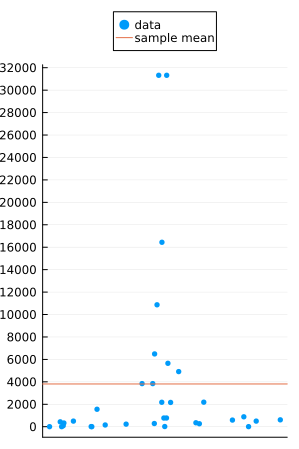

In [71]:
X = [5652 2187 592 265 13 435 3842 31323 4 500 3842 31323 4 500 352 7 229 284 4 613 883 1556 90 16440 774 2164 776 155 330 10867 4913 2178 16 6488]'
@show mean(X) std(X);
dotplot(X; label="data", msc=:auto, ms=3)
hline!([mean(X)]; label="sample mean")
ytick = 0:2000:maximum(X)+2000
plot!(xtick=false, ytick=(ytick, string.(ytick)))
plot!(size=(300, 450), legend=:outertop)

In [58]:
using SymPy
@syms x::real s::positive
gauss_kernel = exp(-x^2/2)/√(2PI)

         2 
       -x  
       ----
  ___   2  
\/ 2 *e    
-----------
      ____ 
  2*\/ pi  

In [59]:
string(gauss_kernel.series(x, 0, 11).removeO())

"-sqrt(2)*x^10/(7680*sqrt(pi)) + sqrt(2)*x^8/(768*sqrt(pi)) - sqrt(2)*x^6/(96*sqrt(pi)) + sqrt(2)*x^4/(16*sqrt(pi)) - sqrt(2)*x^2/(4*sqrt(pi)) + sqrt(2)/(2*sqrt(pi))"

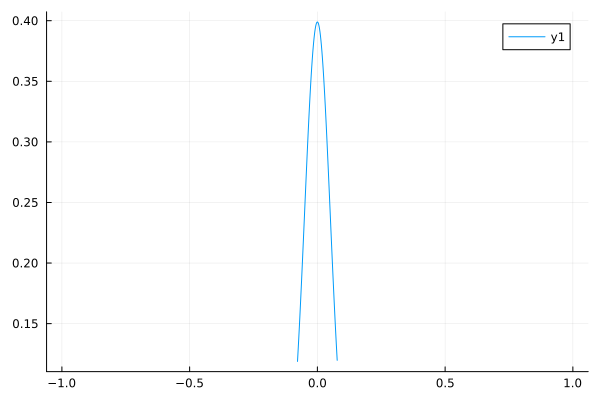

In [63]:
eval(Meta.parse("f(x) = " * string(gauss_kernel.series(x, 0, 1601).removeO())))
plot(x -> f(20x), -1, 1)